In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from csv import reader
from math import sqrt
from random import randrange, uniform

In [114]:
def load_csv(filename):
    file = open(filename, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset
 
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))

        if size == 0:
            continue
        score = 0.0
        
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        
        gini += (1.0 - score) * (size / n_instances)
    return gini

def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    step = 1
    features = list()
    if n_features == len(dataset[0]):
        features = range(0, len(dataset[0]))
        step = 100
    while len(features) < n_features:
        index = randrange(len(dataset[0]) - 1)
        if index not in features:
            features.append(index)
    for index in features:
        for row in dataset[::step]:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index': b_index, 'value': b_value, 'groups': b_groups}
 
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
def split(node, max_depth, n_features, depth):
    left, right = node['groups']
    del(node['groups'])

    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    node['left'] = get_split(left, n_features)
    split(node['left'], max_depth, n_features, depth + 1)

    node['right'] = get_split(right, n_features)
    split(node['right'], max_depth, n_features, depth + 1)
        
def build_tree(train, max_depth, n_features):
    root = get_split(train, n_features)
    split(root, max_depth, n_features, 1)
    return root
 
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
        
def decision_tree(train, test, max_depth, n_features):
    tree = build_tree(train, max_depth, n_features)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return predictions

In [115]:
b_max_depths = []
for i in range(1, 22):
    prefix = str(i)
    if i < 10:
        prefix = '0' + prefix
    train = load_csv(prefix + '_train.csv')
    test = load_csv(prefix + '_test.csv')
    train = train
    test = test
    b_max_depth = 1
    b_accuracy = 0
    n_features = len(train[0])

    for max_depth in range(1, 11):
        predicted = decision_tree(train, test, max_depth, n_features)
        actual = [row[-1] for row in test]
        accuracy = accuracy_metric(actual, predicted)
        if accuracy > b_accuracy:
            b_accuracy = accuracy
            b_max_depth = max_depth
        print(max_depth, accuracy)
        
    b_max_depths.append(b_max_depth)

1 63.82322713257965
2 86.35662898252826
3 99.9743062692703
4 99.94861253854059
5 100.0
6 99.82014388489209
7 99.76875642343268
8 99.76875642343268
9 99.69167523124358
10 99.69167523124358
1 28.949376748918848
2 46.095141185448995
3 62.655812770287454
4 85.42355634698549
5 96.92190282370899
6 100.0
7 100.0
8 100.0
9 100.0
10 100.0
1 99.95180722891567
2 99.95180722891567
3 99.95180722891567
4 99.95180722891567
5 99.56626506024097
6 99.56626506024097
7 99.56626506024097
8 99.03614457831326
9 99.13253012048193
10 98.74698795180723
1 83.76216968011127
2 91.34214186369958
3 96.7663421418637
4 100.0
5 99.47844228094576
6 99.47844228094576
7 99.20027816411682
8 99.1307371349096
9 99.06119610570236
10 99.06119610570236
1 99.78401727861771
2 100.0
3 100.0
4 99.78401727861771
5 99.35205183585313
6 99.78401727861771
7 99.78401727861771
8 99.56803455723542
9 99.56803455723542
10 99.56803455723542
1 80.80529509100938
2 100.0
3 100.0
4 100.0
5 100.0
6 100.0
7 100.0
8 100.0
9 100.0
10 100.0
1 62.11064

In [28]:
b_max_depths

[5, 6, 1, 4, 2, 2, 6, 2, 7, 4, 3, 7, 4, 5, 2, 2, 7, 4, 10, 8, 9]

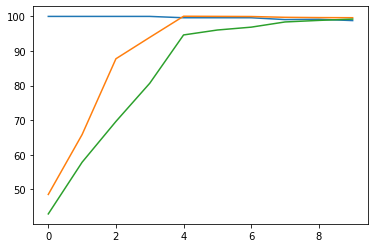

In [32]:
for i in [3, 14, 19]:
    prefix = str(i)
    if i < 10:
        prefix = '0' + prefix
    train = load_csv(prefix + '_train.csv')
    test = load_csv(prefix + '_test.csv')
    n_features = len(train[0])

    acc = []
    for max_depth in range(1, 11):
        predicted = decision_tree(train, test, max_depth, n_features)
        actual = [row[-1] for row in test]
        acc.append(accuracy_metric(actual, predicted))
    plt.plot(acc)

In [77]:
def random_forest(train, test, max_depth, sample_size, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, n_features)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return predictions 

def subsample(dataset, sample_size):
    sample = list()
    while len(sample) < sample_size:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample
 
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [97]:
for i in range(1, 22):
    prefix = str(i)
    if i < 10:
        prefix = '0' + prefix
    train = load_csv(prefix + '_train.csv')
    test = load_csv(prefix + '_test.csv')
    n_features = int(sqrt(len(train[0]) - 1))
    sample_size = int(sqrt(len(train) - 1))
    
    for n_trees in [1, 5, 10]:
        predicted = random_forest(train, test, b_max_depths[i - 1], sample_size, n_trees, n_features)
        actual = [row[-1] for row in test]
        accuracy = accuracy_metric(actual, predicted)
        print(n_trees, accuracy)

1 45.37512846865365
5 67.1120246659815
10 74.12641315519014
1 8.725515136097686
5 10.200966675146274
10 11.854489951666244
1 79.6144578313253
5 86.55421686746988
10 86.55421686746988
1 40.71627260083449
5 49.061196105702365
10 54.90264255910987
1 90.06479481641469
5 92.0086393088553
10 92.0086393088553
1 47.10424710424711
5 58.63210148924435
10 63.81687810259239
1 36.49465364946536
5 33.37982333798234
10 40.353324035332406
1 84.64730290456431
5 96.88796680497926
10 96.88796680497926
1 14.87279843444227
5 23.09197651663405
10 24.65753424657534
1 35.31777956556718
5 45.81657280772325
10 49.11504424778761
1 80.49074818986324
5 80.77232502011263
10 81.45615446500403
1 27.413019079685746
5 38.327721661054994
10 39.253647586980925
1 18.148487626031166
5 18.51512373968836
10 25.481209899175067
1 23.84259259259259
5 26.041666666666668
10 35.03086419753087
1 90.81632653061224
5 94.9579831932773
10 94.9579831932773
1 50.57614450327
5 51.29243226409218
10 88.3836810962317
1 15.234375
5 15.1785714